In [7]:
import pandas as pd
import ramanspy as rp
import numpy as np
import matplotlib.pyplot as plt

In [60]:
import numpy as np
import glob

# Path to dataset folder
folder_path = "../data/dataset/*.txt"

# Read all text files
spectra_data = []
for file in sorted(glob.glob(folder_path)):
    # print(file)
    data = np.loadtxt(file)  # Load text file as a NumPy array
    spectra_data.append(data[:, 1])  # Store only the y-values (intensity)

# spectra_data
# spectra_array = np.array(spectra_data)  # Convert list to 2D NumPy array

# print(f"Loaded {len(spectra_array)} spectra, each with {spectra_array.shape[1]} data points.")


In [22]:
len(sorted(glob.glob(folder_path)))

3516

In [61]:
import numpy as np
import glob

# Path to dataset folder
folder_path = "../data/dataset/*.txt"

spectra_data = []
lengths = []

for file in glob.glob(folder_path):
    data = np.loadtxt(file)  # Load text file as a NumPy array
    y_values = data[:, 1]  # Extract y-values (intensity)
    spectra_data.append(y_values)
    lengths.append(len(y_values))

# Check if all spectra have the same length
min_length = min(lengths)
max_length = max(lengths)

if min_length != max_length:
    print(f"Warning: Spectra lengths vary! Min: {min_length}, Max: {max_length}")

    # Option 1: Trim all spectra to the shortest length
    spectra_data = [s[:min_length] for s in spectra_data]

    # Option 2: Pad shorter spectra (uncomment if preferred)
    # spectra_data = [np.pad(s, (0, max_length - len(s)), mode='constant') for s in spectra_data]

spectra_array = np.array(spectra_data)  # Convert to 2D NumPy array

print(f"Loaded {len(spectra_array)} spectra, each with {spectra_array.shape[1]} data points.")


Loaded 3516 spectra, each with 568 data points.


In [69]:
spectra_array[1].shape

(568,)

again but with csv

In [70]:
import pandas as pd
import numpy as np

# Load the CSV file
file_path = "../data/dataset/ILSdata.csv"
data = pd.read_csv(file_path)

# Separate metadata and spectra
metadata_columns = ['labcode', 'substrate', 'laser', 'method', 'sample', 'type', 'conc', 'batch', 'replica']
spectra_data = data.drop(columns=metadata_columns)  # Remove metadata columns to get spectra
spectra_data = spectra_data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, with NAs where necessary

# Convert spectra to a NumPy array
spectra_array = spectra_data.to_numpy()

print(f"Loaded {spectra_array.shape[0]} spectra, each with {spectra_array.shape[1]} data points.")


Loaded 3516 spectra, each with 534 data points.


In [71]:
import pandas as pd

# Load the CSV file
file_path = "../data/dataset/ILSdata.csv"
data = pd.read_csv(file_path)

# Print the first few column names
print("First few column names:", data.columns[:10])

# Extract all spectral column names (wavenumbers)
wavenumbers = data.columns[len(['labcode', 'substrate', 'laser', 'method', 'sample', 'type', 'conc', 'batch', 'replica']):]
print("Wavenumber range:", wavenumbers[0], "to", wavenumbers[-1])


First few column names: Index(['labcode', 'substrate', 'laser', 'method', 'sample', 'type', 'conc',
       'batch', 'replica', '400'],
      dtype='object')
Wavenumber range: 400 to 1999


In [72]:
data.head()

,labcode,substrate,laser,method,sample,type,conc,batch,replica,400,...,1972,1975,1978,1981,1984,1987,1990,1993,1996,1999
0,P01,cAg,785,cAg@785,C0,blank,0.0,1,NaN,66533.0,...,31105.0,31086.0,30976.0,30832.0,30520.0,30384.0,30304.0,30478.0,30686.0,30488.0
1,P01,cAg,785,cAg@785,C0,blank,0.0,2,NaN,95228.0,...,56002.0,56033.0,55679.0,55323.0,55309.0,55120.0,54958.0,55368.0,55632.0,55181.0
2,P01,cAg,785,cAg@785,C0,blank,0.0,3,NaN,80044.0,...,38771.0,38749.0,38403.0,38072.0,38065.0,37916.0,37802.0,38220.0,38274.0,38075.0
3,P01,cAg,785,cAg@785,C1,train,0.2,1,NaN,77645.0,...,37098.0,37074.0,36959.0,36881.0,36877.0,36573.0,36300.0,36542.0,36620.0,36446.0
4,P01,cAg,785,cAg@785,C1,train,0.2,2,NaN,85099.0,...,61930.0,59627.0,59665.0,59420.0,59375.0,59198.0,58705.0,59363.0,59735.0,59254.0


In [73]:
np.unique(spectra_data.count().values)

array([3336, 3381, 3516])

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Load the CSV file
file_path = "../data/dataset/ILSdata.csv"
data = pd.read_csv(file_path)

# Separate metadata and spectra
metadata_columns = ['labcode', 'substrate', 'laser', 'method', 'sample', 'type', 'conc', 'batch', 'replica']
spectra_data = data.drop(columns=metadata_columns)  # Remove metadata columns to get spectra
spectra_data = spectra_data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, with NAs where necessary

# Convert spectra to a NumPy array
spectra_array = spectra_data.to_numpy()

# Replace NaN values with 0
spectra_array = np.nan_to_num(spectra_array, nan=0.0)

# Extract the target variable (substrate)
target = data['substrate'].values

# Encode the substrate labels into integers
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Convert the encoded labels to one-hot encoding
num_classes = len(label_encoder.classes_)
target_one_hot = to_categorical(target_encoded, num_classes=num_classes)

# Split the data into training (80%), validation (10%), and test (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(spectra_array, target_one_hot, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the data
# scaler = StandardScaler()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()

# Input layer
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Dropout for regularization
model.add(Dense(32, activation='relu'))

# Output layer (for multi-class classification)
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with a lower learning rate and gradient clipping
model.compile(optimizer=Adam(learning_rate=0.001, clipvalue=1.0), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class labels

# Decode the predicted labels back to substrate names
predicted_substrates = label_encoder.inverse_transform(predicted_labels)

# Compare predictions with actual values
for i in range(5):
    print(f"Predicted: {predicted_substrates[i]}, Actual: {label_encoder.inverse_transform([np.argmax(y_test[i])])[0]}")

/Users/mitsuko/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 128)            │        68,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78,948 (308.39 KB)

 Trainable params: 78,948 (308.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5305 - loss: 1.1926 - val_accuracy: 0.6420 - val_loss: 0.9066
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6529 - loss: 0.9008 - val_accuracy: 0.6676 - val_loss: 0.8261
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6763 - loss: 0.8432 - val_accuracy: 0.7131 - val_loss: 0.8043
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7233 - loss: 0.7641 - val_accuracy: 0.7216 - val_loss: 0.7422
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7285 - loss: 0.7115 - val_accuracy: 0.7898 - val_loss: 0.6155
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7685 - loss: 0.6000 - val_accuracy: 0.7869 - val_loss: 0.5660
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7897 - loss: 0.5580 - val_accuracy: 0.8182 - val_loss: 0.5169
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7970 - loss: 0.5175 - val_accuracy: 0.7415 - val_loss:

In [41]:
# Load the CSV file
file_path = "../data/dataset/ILSdata.csv"
data = pd.read_csv(file_path)

# Separate metadata and spectra
metadata_columns = ['labcode', 'substrate', 'laser', 'method', 'sample', 'type', 'conc', 'batch', 'replica']
spectra_data = data.drop(columns=metadata_columns)  # Remove metadata columns to get spectra
spectra_data = spectra_data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, with NAs where necessary

# Convert spectra to a NumPy array
spectra_array = spectra_data.to_numpy()

# Replace NaN values with 0
spectra_array = np.nan_to_num(spectra_array, nan=0.0)

# Extract the target variable (substrate)
target = data['substrate'].values

# Encode the substrate labels into integers
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Convert the encoded labels to one-hot encoding
num_classes = len(label_encoder.classes_)
target_one_hot = to_categorical(target_encoded, num_classes=num_classes)

# Split the data into training (80%), validation (10%), and test (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(spectra_array, target_one_hot, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [84]:
spectra_array = spectra_data.to_numpy()
print(f"Number of nans {np.where(np.isnan(spectra_array) == True)[1].shape} of total {spectra_array.shape[0] * spectra_array.shape[1]}")

Number of nans (27180,) of total 1877544


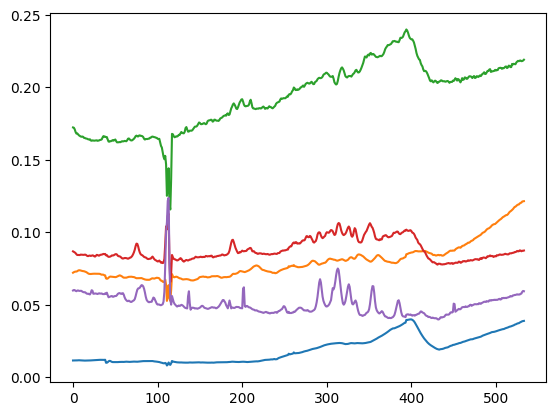

In [77]:
plt.plot(X_test[0])
plt.plot(X_test[1])
plt.plot(X_test[2])
plt.plot(X_test[3])
plt.plot(X_test[4])